# Project 1: SAT & ACT Analysis



## Problem Statement

To identify insightful trend to suggest effective measures to implement to increase participation rate in states with low SAT participation rate. 

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [274]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [275]:
#Code:
sat_2017 = '../data/sat_2017.csv'
act_2017 = '../data/act_2017.csv'

import pandas as pd
sat17 = pd.read_csv(sat_2017)
act17 = pd.read_csv(act_2017)

#### 2. Display Data

Print the first 10 rows of each dataframe 

In [276]:
#Code:
sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [277]:
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [278]:
print(sat17.shape)
sat17.describe()

(51, 5)


,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [279]:
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


The Sat 2017 data has 51 observations and 5 columns (3numerical and 2 string). There is probably some wrong data in the Math score as the min score from the data is 52 but the minimum score for SAT is 400.

In [280]:
print(act17.shape)
act17.describe()

(52, 7)


,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [281]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


The Sat 2017 data has 52 observations and 7 columns (4 numerical and 3 string).Composite should be float instead of object, some data may be wrong. 

#### 4a. Does the data look complete? 

In [282]:
sat17.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [283]:
act17.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

Answer: Both data seems to be completed (without Nan) with data from 51 states

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

SAT: 400 - 1600 (200 - 800 each)

ACT: 1  - 36

#### 4c. Fixing error

In [284]:
sat17[~sat17['Math'].between(200,800)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [285]:
#Assign wrong value with the correct value based on website source
sat17.at[20,'Math'] = 524
#Double check
sat17[~sat17['Math'].between(200,800)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [286]:
#Identify error in ACT 2017
for j, i in enumerate(act17['Composite']):
    if len(i) != 4:
        print('Row with error: ' + str(j))
        print('Error value: ' +i)

Row with error: 51
Error value: 20.2x


In [287]:
#Fix error in ACT 2017
act17.at[51,'Composite'] = 20.2

#### 5. Displaying Data Type

In [288]:
#SAT 2017 
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [289]:
#ACT 2017
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The composite in ACT 2017 should be float instead of object. Participation rat efor both data should be converted to float.

#### 6. Fix Incorrect Data Types


In [290]:
def datatype(data):
    partofloat = lambda x: float(x[0:-1])
    for i in data:
        if i == 'Participation':
            data[i] = data[i].apply(partofloat)
        elif i == 'Composite' or data[i].dtype == 'int64':
            data[i] = data[i].astype('float')

In [291]:
#Fix and display data to ensure all are in correct type
datatype(sat17)
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [292]:
#Fix and display data to ensure all are in correct type
datatype(act17)
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


#### 7. Rename Columns


In [293]:
sat17.columns = ['sat17_' + col.lower() if col != 'State' else col.lower() for col in sat17.columns]
sat17.rename(columns={'sat17_evidence-based reading and writing':'sat17_ebrw'}, inplace=True)
sat17.head()

,state,sat17_participation,sat17_ebrw,sat17_math,sat17_total
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0
2,Arizona,30.0,563.0,553.0,1116.0
3,Arkansas,3.0,614.0,594.0,1208.0
4,California,53.0,531.0,524.0,1055.0


In [294]:
act17.columns = ['act17_' + col.lower() if col != 'State' else col.lower() for col in act17.columns]
act17.head()

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

| Feature              | Type   | Dataset | Min | Max  | Description                                                                  |
|----------------------|--------|---------|-----|------|------------------------------------------------------------------------------|
| state                | object | SAT     | \-  | \-   | The state of USA with students participated in SAT & ACT                     |
| sat17\_participation | float  | SAT     | 0   | 100  | The 2017 participation rate of students of each state for SAT                |
| sat17\_ebrw          | float  | SAT     | 200 | 800  | The 2017 average score of Evidence\-Based Reading and Writing for each state |
| sat17\_math          | float  | SAT     | 200 | 800  | The 2017 average score of Math for each state                                |
| sat17\_total         | float  | SAT     | 400 | 1600 | The 2017 average total score of SAT for each state                           |
| sat18\_participation | float  | SAT     | 0   | 100  | The 2018 participation rate of students of each state for SAT                |
| sat18\_ebrw          | float  | SAT     | 200 | 800  | The 2018 average score of Evidence\-Based Reading and Writing for each state |
| sat18\_math          | float  | SAT     | 200 | 800  | The 2018 average score of Math for each state                                |
| sat18\_total         | float  | SAT     | 400 | 1600 | The 2018 average total score of SAT for each state                           |
| act17\_participation | float  | ACT     | 0   | 100  | The 2017 participation rate of students of each state for ACT                |
| act17\_english       | float  | ACT     | 1   | 36   | The 2017 average score of English for each state                             |
| act17\_math          | float  | ACT     | 1   | 36   | The 2017 average score of Math for each state                                |
| act17\_reading       | float  | ACT     | 1   | 36   | The 2017 average score of Reading for each state                             |
| act17\_science       | float  | ACT     | 1   | 36   | The 2017 average score of Science for each state                             |
| act17\_composite     | float  | ACT     | 1   | 36   | The2017  average composite score of ACT for each state                       |
| act18\_participation | float  | ACT     | 0   | 100  | The 2018 participation rate of students of each state for ACT                |
| act18\_english       | float  | ACT     | 1   | 36   | The 2018 average score of English for each state                             |
| act18\_math          | float  | ACT     | 1   | 36   | The 2018 average score of Math for each state                                |
| act18\_reading       | float  | ACT     | 1   | 36   | The 2018 average score of Reading for each state                             |
| act18\_science       | float  | ACT     | 1   | 36   | The 2018 average score of Science for each state                             |
| act18\_composite     | float  | ACT     | 1   | 36   | The2018  average composite score of ACT for each state                       |


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. 

In [295]:
#code
act17.drop(act17.index[0], inplace=True)

In [296]:
act17.head()

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [297]:
#Code:
combined_2017 = pd.merge(sat17,act17,on='state',how='right') #merging 2 data sets on state
combined_2017.head()

,state,sat17_participation,sat17_ebrw,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save merged dataframe

In [298]:
#code
combined_2017.to_csv('../data/combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

In [299]:
sat_2018 = '../data/sat_2018.csv'
act_2018 = '../data/act_2018_updated.csv'

import pandas as pd
sat18 = pd.read_csv(sat_2018) #reading SAT 2018 file as SAT18
act18 = pd.read_csv(act_2018) #reading ACT 2018 file as ACT18

In [300]:
print(sat18.shape)
sat18.describe()

(51, 5)


,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [301]:
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [302]:
print(act18.shape)
act18.describe()

(51, 7)


,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [303]:
act18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


Both data seems alright with no error.

In [304]:
#Covert into right data type
datatype(sat18)
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [305]:
#Covert into right data type
datatype(act17)
act17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 7 columns):
state                  51 non-null object
act17_participation    51 non-null float64
act17_english          51 non-null float64
act17_math             51 non-null float64
act17_reading          51 non-null float64
act17_science          51 non-null float64
act17_composite        51 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.2+ KB


In [306]:
sat18.columns = ['sat18_' + col.lower() if col != 'State' else col.lower() for col in sat18.columns]
sat18.rename(columns={'sat18_evidence-based reading and writing':'sat18_ebrw'}, inplace=True)
sat18.head()

,state,sat18_participation,sat18_ebrw,sat18_math,sat18_total
0,Alabama,6.0,595.0,571.0,1166.0
1,Alaska,43.0,562.0,544.0,1106.0
2,Arizona,29.0,577.0,572.0,1149.0
3,Arkansas,5.0,592.0,576.0,1169.0
4,California,60.0,540.0,536.0,1076.0


In [307]:
act18.columns = ['state', 'act18_participation', 'act18_composite','act18_english', 'act18_math',
       'act18_reading', 'act18_science']
act18.head()

,state,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [308]:
combined_2018 = pd.merge(sat18,act18,on='state',how='right') #merging 2 data sets on state
combined_2018.head()

,state,sat18_participation,sat18_ebrw,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
0,Alabama,6.0,595.0,571.0,1166.0,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562.0,544.0,1106.0,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577.0,572.0,1149.0,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592.0,576.0,1169.0,100,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540.0,536.0,1076.0,27,22.7,22.5,22.5,23.0,22.1


#### Combine 2017 and 2018 data into a single dataframe

In [309]:
#combining 2017 & 2018 data
final = pd.merge(combined_2017,combined_2018,on='state',how='right')
#writing to .csv
final.to_csv('../data/final.csv',index=False)

## Exploratory Data Analysis


### 1. Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [310]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_ebrw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
act17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [388]:
#Function to calculate standard deviation
def sd(data):
    mean = 0
    stand_dev = []
    #To assign nan value to 1st item in the list as it correspond to 'state'
    stand_dev.append(np.nan)
    #looping through each column in data
    for i in data: 
        #pass to next loop for the first column
        if i == 'state':
            pass
        else:
            #Calculate the mean for each column & assign to a temporary mean variable
            mean = data[i].mean()
            #Reset the temp variable for each i loop to reset calculation for STD
            temp = 0
            #looping through each row in each column to calculate variance
            for j in data[i]:
                #To pass if encounter a nan value in the data (Only 1 in this project)
                if np.isnan(j):
                    pass
                else:
                    #Sum up the temporary (x-mean)**2 value for the whole column
                    temp = temp + (j - mean)**2
            #Add the caculated STD to the stand_dev list        
            stand_dev.append(round(np.sqrt(temp/len(data)),2))  
            
    #Return the completed standard deviation in a list        
    return stand_dev

In [389]:
#Code incorporating zip function for creating dictionary  :
sd_dict = dict(zip(final.keys(),sd(final)))
sd_dict

{'state': nan,
 'sat17_participation': 34.93,
 'sat17_ebrw': 45.22,
 'sat17_math': 46.66,
 'sat17_total': 91.58,
 'act17_participation': 31.82,
 'act17_english': 2.33,
 'act17_math': 1.96,
 'act17_reading': 2.05,
 'act17_science': 3.15,
 'act17_composite': 2.0,
 'sat18_participation': 36.95,
 'sat18_ebrw': 47.03,
 'sat18_math': 47.3,
 'sat18_total': 93.23,
 'act18_participation': 33.75,
 'act18_composite': 2.09,
 'act18_english': 2.42,
 'act18_math': 2.02,
 'act18_reading': 2.15,
 'act18_science': 1.85}

In [390]:
#Using np.std to calculate standard deviation
for i in final:
    if i != 'state':
        mean_temp = round(np.std(final[i]),2)
        print(mean_temp)

34.93
45.22
46.66
91.58
31.82
2.33
1.96
2.05
3.15
2.0
36.95
47.03
47.3
93.23
33.75
2.09
2.42
2.02
2.15
1.85


There is slight difference between the manually calculated standard deviations with pandas describe. The standard deviation value of both manually calculated and numpy method is the same. 

> <font size = 3 color = "crimson"> Correct. The difference is due to Bessel's correction being applied in std calculations for pandas. https://www.statisticshowto.datasciencecentral.com/bessels-correction/</font>

#### Investigate trends in the data

#### The Highest & Lowest Participated State for SAT & ACT in both Years

In [313]:
#Creating masking to find highest  & lowest participation rate for SAT & ACT in both years
highest_sat2017 = (final['sat17_participation']== final['sat17_participation'].max()) #Highest SAT 2017
lowest_sat2017 = (final['sat17_participation'] == final['sat17_participation'].min()) #Lowest SAT 2017
highest_sat2018 = final['sat18_participation'] == final['sat18_participation'].max()  #Highest SAT 2018
lowest_sat2018 = final['sat18_participation'] == final['sat18_participation'].min()   #Lowest SAT 2018

highest_act2017 = (final['act17_participation'] == final['act17_participation'].max())
lowest_act2017 = (final['act17_participation'] == final['act17_participation'].min())
highest_act2018 = (final['act18_participation'] == final['act18_participation'].max())
lowest_act2018 = (final['act18_participation'] == final['act18_participation'].min())

In [316]:
#Highest participated state for SAT 2017
final[highest_sat2017][['state','sat17_participation']]

,state,sat17_participation
6,Connecticut,100.0
7,Delaware,100.0
8,District of Columbia,100.0
22,Michigan,100.0


In [317]:
#Lowest participated state for SAT 2017
final[lowest_sat2017][['state','sat17_participation']]

,state,sat17_participation
15,Iowa,2.0
24,Mississippi,2.0
34,North Dakota,2.0


In [318]:
#Highest participated state for SAT 2018
final[highest_sat2018][['state','sat18_participation']]

,state,sat18_participation
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
12,Idaho,100.0
22,Michigan,100.0


In [319]:
#Lowest participated state for SAT 2018
final[lowest_sat2018][['state','sat18_participation']]

,state,sat18_participation
34,North Dakota,2.0


In [320]:
#Highest participated state for ACT 2017
final[highest_act2017][['state','act17_participation']]

,state,act17_participation
0,Alabama,100.0
3,Arkansas,100.0
5,Colorado,100.0
17,Kentucky,100.0
18,Louisiana,100.0
23,Minnesota,100.0
24,Mississippi,100.0
25,Missouri,100.0
26,Montana,100.0
28,Nevada,100.0


In [321]:
#Lowest participated state for ACT 2017
final[lowest_act2017][['state','act17_participation']]

,state,act17_participation
19,Maine,8.0


In [322]:
#Highest participated state for ACT 2018
final[highest_act2018][['state','act18_participation']]

,state,act18_participation
0,Alabama,100
3,Arkansas,100
17,Kentucky,100
18,Louisiana,100
24,Mississippi,100
25,Missouri,100
26,Montana,100
27,Nebraska,100
28,Nevada,100
33,North Carolina,100


In [323]:
#Lowest participated state for ACT 2018
final[lowest_act2018][['state','act18_participation']]

,state,act18_participation
19,Maine,7


#### SAT2017

**Highest Participated State**: 

Connecticut, Delaware, District of Columbia & Michigan

**Lowest Participated State**: 

Iowa, Mississippi & North Dakota

#### SAT2018

**Highest Participated State**:

Colorado, Connecticut, Delaware, Idaho & Michigan

**Lowest Participated State**: 

North Dakota

#### ACT2017

**Highest Participated State**: 

Alabama, Arkansas, Colorado , Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

**Lowest Participated State**: 

Maine

#### ACT2018

**Highest Participated State**: 

Alabama, Arkansas , Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

**Lowest Participated State**: 

Maine

#### The Highest & Lowest Mean Total/Composite Score State for SAT & ACT in both Years

In [324]:
#SAT 2017 highest mean total score
final.sort_values('sat17_total',ascending=False).head()[['state','sat17_total']]

,state,sat17_total
23,Minnesota,1295.0
49,Wisconsin,1291.0
15,Iowa,1275.0
25,Missouri,1271.0
16,Kansas,1260.0


In [325]:
#SAT 2017 lowest mean total score
final.sort_values('sat17_total',ascending=True).head()[['state','sat17_total']]

,state,sat17_total
8,District of Columbia,950.0
7,Delaware,996.0
12,Idaho,1005.0
22,Michigan,1005.0
19,Maine,1012.0


In [326]:
#SAT 2018 highest mean total score
final.sort_values('sat18_total',ascending=False).head()[['state','sat18_total']]

,state,sat18_total
23,Minnesota,1298.0
49,Wisconsin,1294.0
34,North Dakota,1283.0
15,Iowa,1265.0
16,Kansas,1265.0


In [327]:
#SAT 2018 lowest mean total score
final.sort_values('sat18_total',ascending=True).head()[['state','sat18_total']]

,state,sat18_total
8,District of Columbia,977.0
7,Delaware,998.0
48,West Virginia,999.0
12,Idaho,1001.0
44,Utah,1010.0


In [328]:
#ACT 2017 highest mean total score
final.sort_values('act17_composite',ascending=False).head()[['state','act17_composite']]

,state,act17_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [329]:
#ACT 2017 lowest mean total score
final.sort_values('act17_composite',ascending=True).head()[['state','act17_composite']]

,state,act17_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [330]:
#ACT 2018 highest mean total score
final.sort_values('act18_composite',ascending=False).head()[['state','act18_composite']]

,state,act18_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [331]:
#ACT 2018 lowest mean total score
final.sort_values('act18_composite',ascending=True).head()[['state','act18_composite']]

,state,act18_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


##### SAT2017

**Highest Total Score State**: 

Minnesota

**Lowest Total Score State**: 

District of Columbia

##### SAT2018

**Highest Total Score State**: 

Minnesota

**Lowest Total Score State**: 

District of Columbia

##### ACT2017

**Highest Composite Score State**: 

New Hampshire		

**Lowest Composite Score State**: 

Nevada	


##### ACT2018

**Highest Composite Score State**: 

Connecticut	

**Lowest Composite Score State**:  

Nevada	

#### Do any states with 100% participation on a given test have a rate change year-to-year?

In [315]:
#SAT
final[(final['sat17_participation'] == 100) | (final['sat18_participation'] == 100)][['state','sat17_participation','sat18_participation']]

,state,sat17_participation,sat18_participation
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
8,District of Columbia,100.0,92.0
12,Idaho,93.0,100.0
22,Michigan,100.0,100.0


Colorado has an increase of 809% in SAT participation rate

District of Columnbia has a decrease of 8.69% in SAT participation rate

Idaho has an increase of 7.52% in SAT participation rate

In [312]:
#ACT
final[((final['act17_participation'] == 100) & (final['act18_participation'] != 100))| ((final['act17_participation'] != 100) & (final['act18_participation'] == 100))][['state','act17_participation','act18_participation']]

,state,act17_participation,act18_participation
5,Colorado,100.0,30
23,Minnesota,100.0,99
27,Nebraska,84.0,100
35,Ohio,75.0,100


Colorado has a decrease of 70% in ACT participation rate

Minnesota has a decrease of 1 % in ACT participation rate

Nebraska has an increase of 19% in ACT participation rate

Ohio has an increase of 33.3% in ACT participation rate

#### Do any states show have >50% participation on both tests either year?

In [332]:
#2017
print('Number of states >50% participation on both test in 2017: ' + str(len(final[(final['sat17_participation'] > 50) & (final['act17_participation'] > 50)][['state','sat17_participation','act17_participation']])))
final[(final['sat17_participation'] > 50) & (final['act17_participation'] > 50)][['state','sat17_participation','act17_participation']]

Number of states >50% participation on both test in 2017: 3


,state,sat17_participation,act17_participation
9,Florida,83.0,73.0
10,Georgia,61.0,55.0
11,Hawaii,55.0,90.0


In [333]:
#2018
print('Number of states > 50% participation on both test in 2018: ' + str(len(final[(final['sat18_participation'] > 50) & (final['act18_participation'] > 50)][['state','sat18_participation','act18_participation']])))
final[(final['sat18_participation'] > 50) & (final['act18_participation'] > 50)][['state','sat18_participation','act18_participation']]

Number of states > 50% participation on both test in 2018: 5


,state,sat18_participation,act18_participation
9,Florida,56.0,66
10,Georgia,70.0,53
11,Hawaii,56.0,89
33,North Carolina,52.0,100
40,South Carolina,55.0,100


## Visualize the data

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

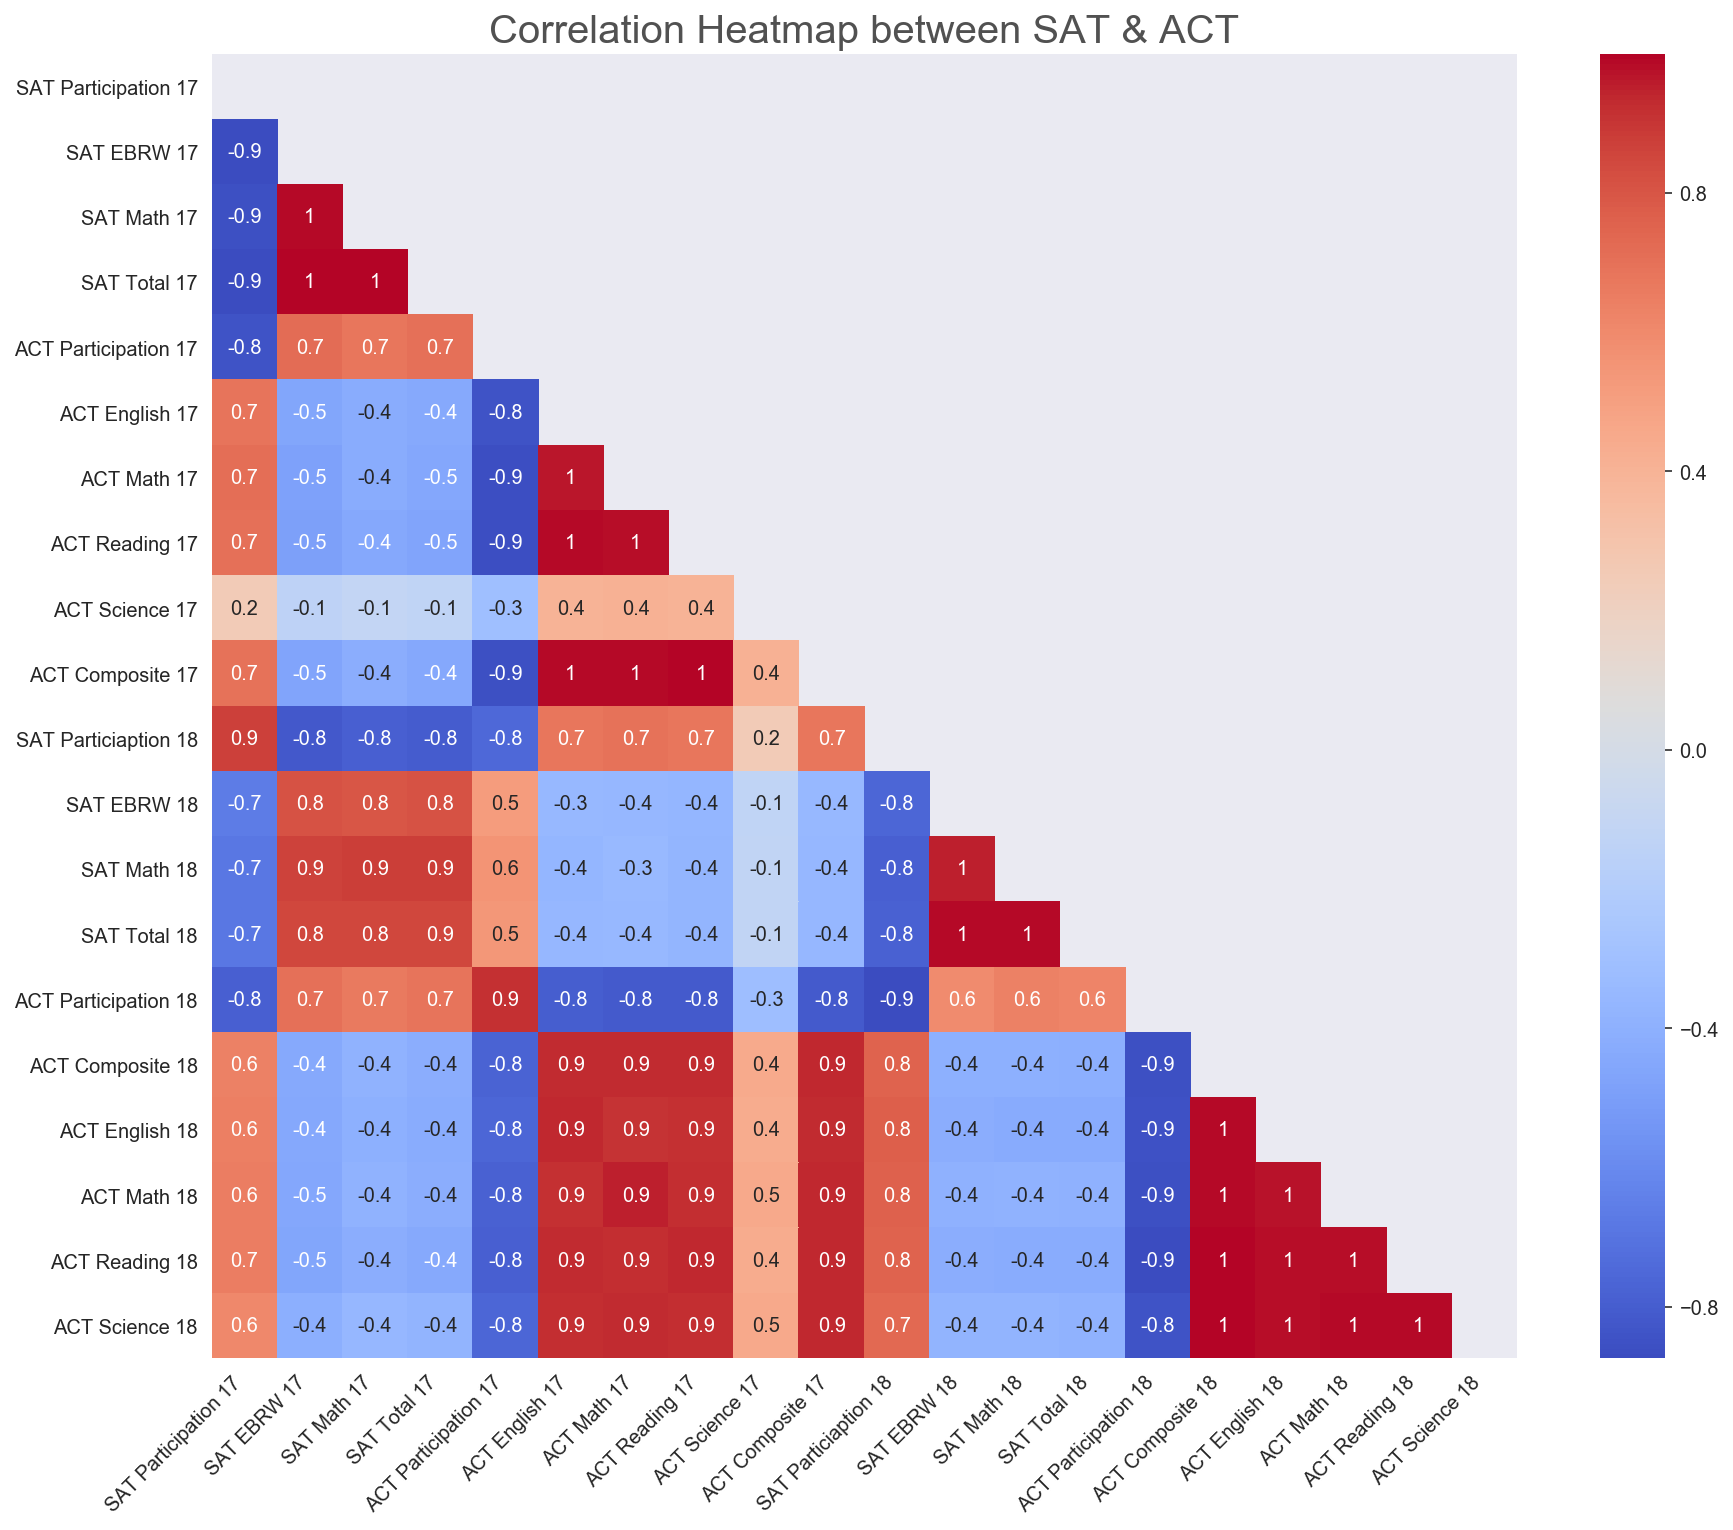

In [334]:
#Calculating correlation of final
final_corr = final.corr()

#Setting up the x and y label in a list
label = ['SAT Participation 17', 'SAT EBRW 17', 'SAT Math 17', 'SAT Total 17', 
         'ACT Participation 17', 'ACT English 17', 'ACT Math 17', 'ACT Reading 17', 
         'ACT Science 17', 'ACT Composite 17', 'SAT Particiaption 18', 'SAT EBRW 18', 
         'SAT Math 18', 'SAT Total 18', 'ACT Participation 18', 'ACT Composite 18','ACT English 18', 
         'ACT Math 18', 'ACT Reading 18', 'ACT Science 18']

#Setting up plot size
plt.figure(figsize=(15,12))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(final_corr)
mask[np.triu_indices_from(mask)] = True

#plot design & title
ax = sns.heatmap(final_corr,mask=mask, cmap='coolwarm',annot=True,xticklabels = label, 
                 yticklabels=label, square = True, fmt='.1g')
ax.set_title('Correlation Heatmap between SAT & ACT',fontsize = 20,fontweight = 4, y = 2,alpha=0.8)
#Rotate X label for readability
plt.xticks(rotation = 45)

#Offsetting X label to the right
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

**Intepretation**

In general, the subject score of SAT has a inverse relationship with the corresponding ACT subject score. 

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [335]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (10,13) ) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], label = list_of_xlabels[i], bins = 20) # feel free to add more settings
        ax[i].set_title(list_of_titles[i],fontsize = 20,fontweight = 4, y = 1.01,alpha=0.8) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i],fontsize = 8,fontweight = 2, alpha=0.8)
        ax[i].set_ylabel('No. of occurrance',fontsize = 8,fontweight = 2, alpha=0.8)
        ax[i].axvline(dataframe[column].mean(),color='r')

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

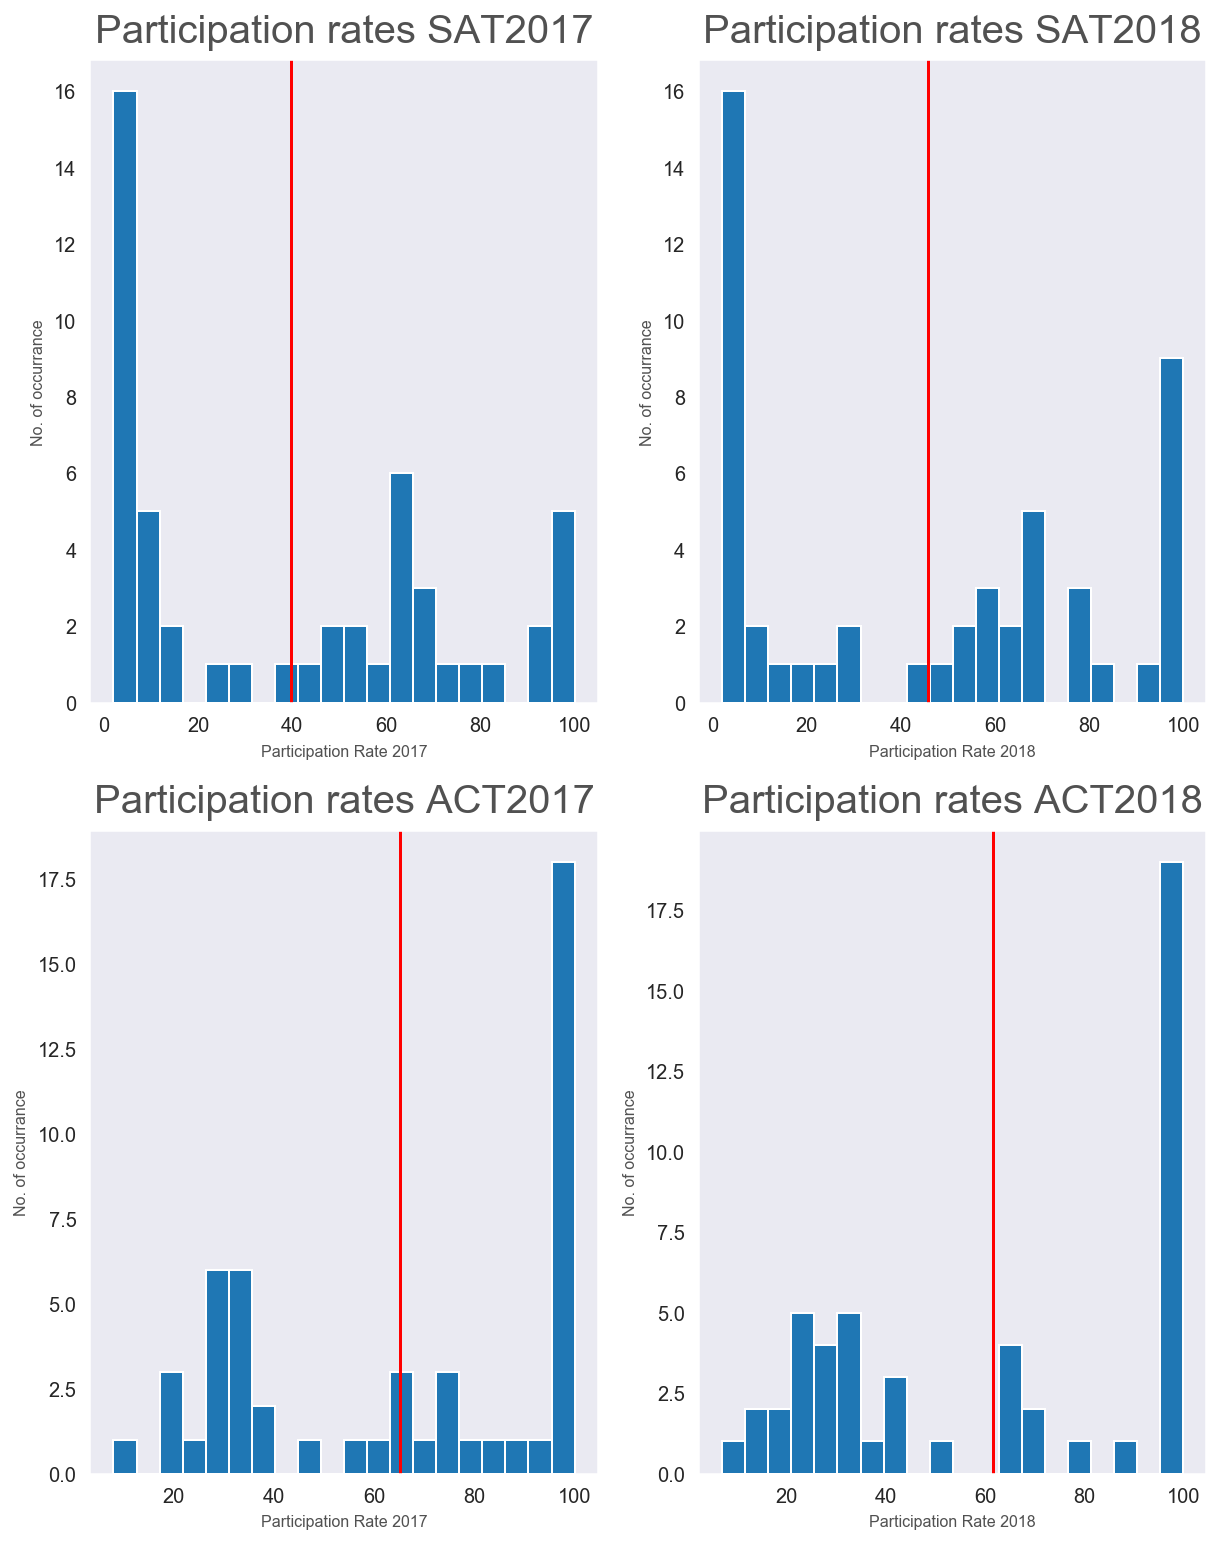

In [336]:
# Plotting Participation rates for SAT & ACT

#Setting up titles
list_of_titles1 = ['Participation rates SAT2017', 'Participation rates SAT2018','Participation rates ACT2017', 'Participation rates ACT2018']
#Setting up labels
list_of_xlabels1 = ['Participation Rate 2017', 'Participation Rate 2018','Participation Rate 2017', 'Participation Rate 2018']
#Setting up columns
list_of_columns1 = [final.columns[1], final.columns[11],final.columns[5], final.columns[15]]
#Run function to plot graph
subplot_histograms(final,list_of_columns1, list_of_titles1, list_of_xlabels1 )

**Interpretation**

There are more states with 100% participation rate for SAT in 2018 as compare to 2017. For ACT, it seems to have lesser states with low participation rate but no sigificant increase in states with high participation rate. 

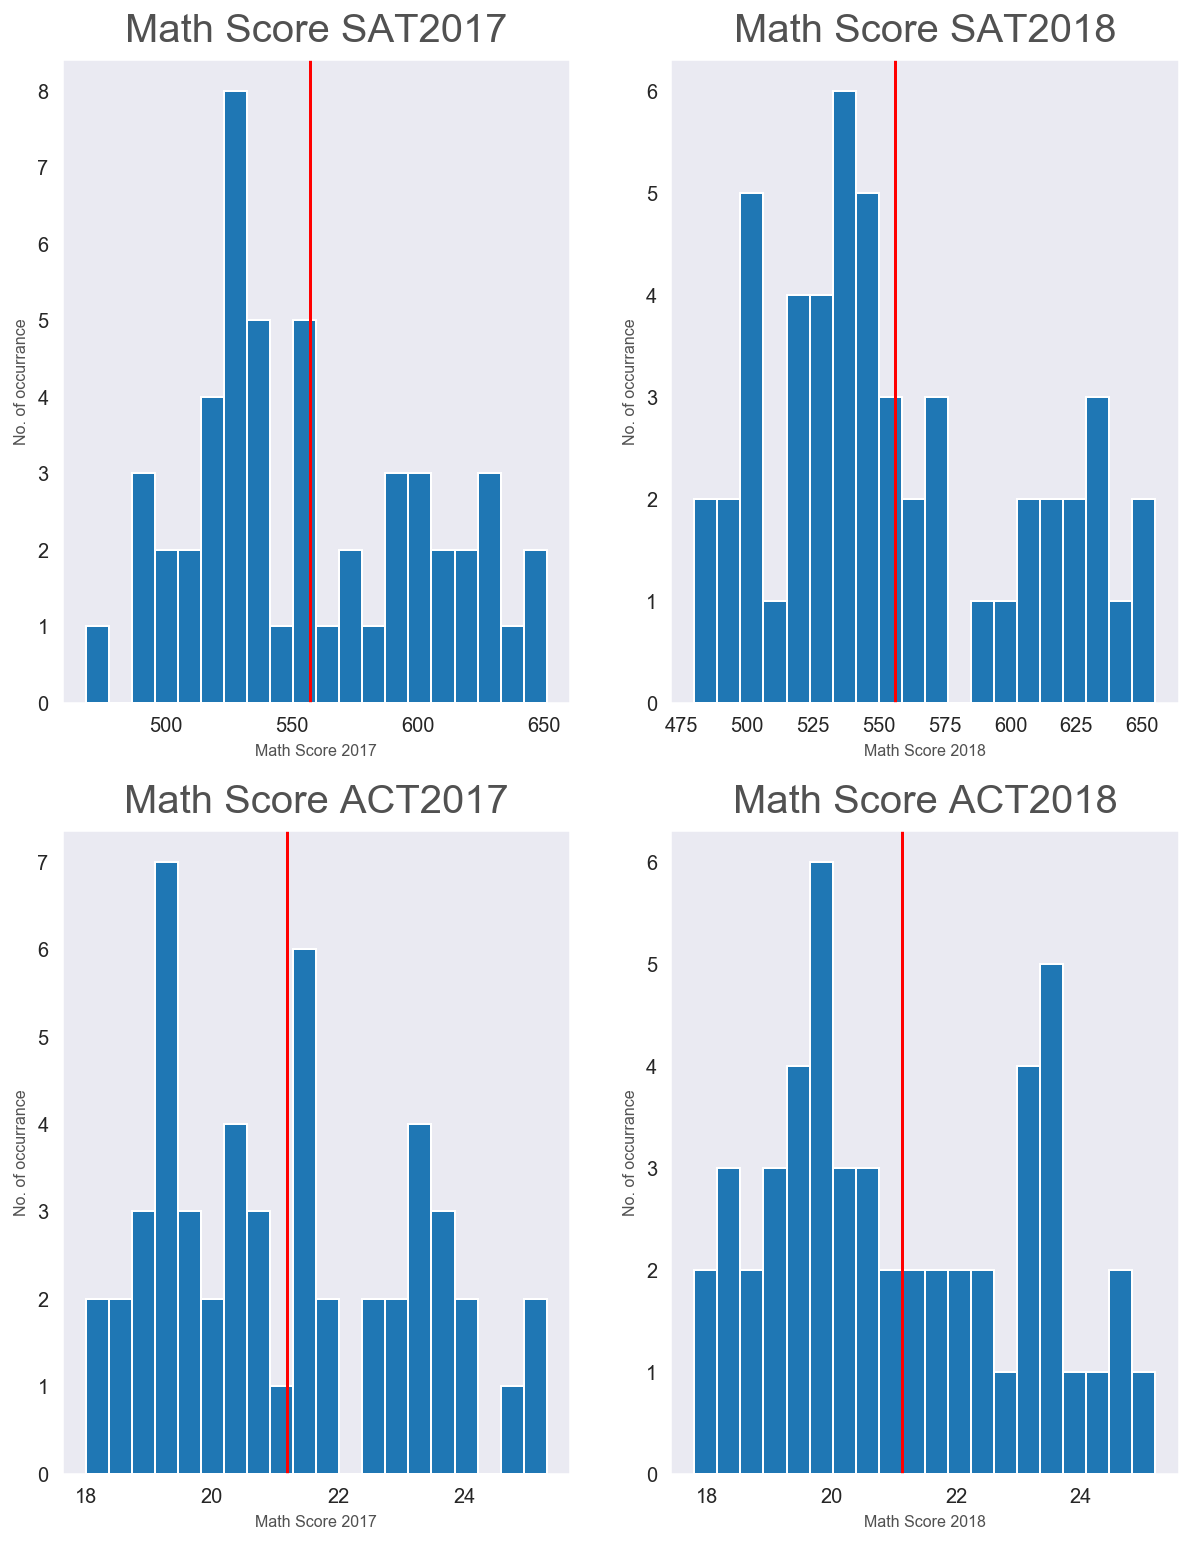

In [337]:
# Plotting Math scores for SAT & ACT
#Setting up titles
list_of_titles1 = ['Math Score SAT2017',  'Math Score SAT2018', 'Math Score ACT2017','Math Score ACT2018']
#Setting up labels
list_of_xlabels1 = ['Math Score 2017', 'Math Score 2018','Math Score 2017', 'Math Score 2018']
#Setting up columns
list_of_columns1 = [final.columns[3],  final.columns[13],final.columns[7], final.columns[18]]
#Run function to plot graph
subplot_histograms(final,list_of_columns1, list_of_titles1, list_of_xlabels1 )

**Intepretation**

The math score of both SAT and ACT seems to have shift towards the left, or have more states with lower math score. 

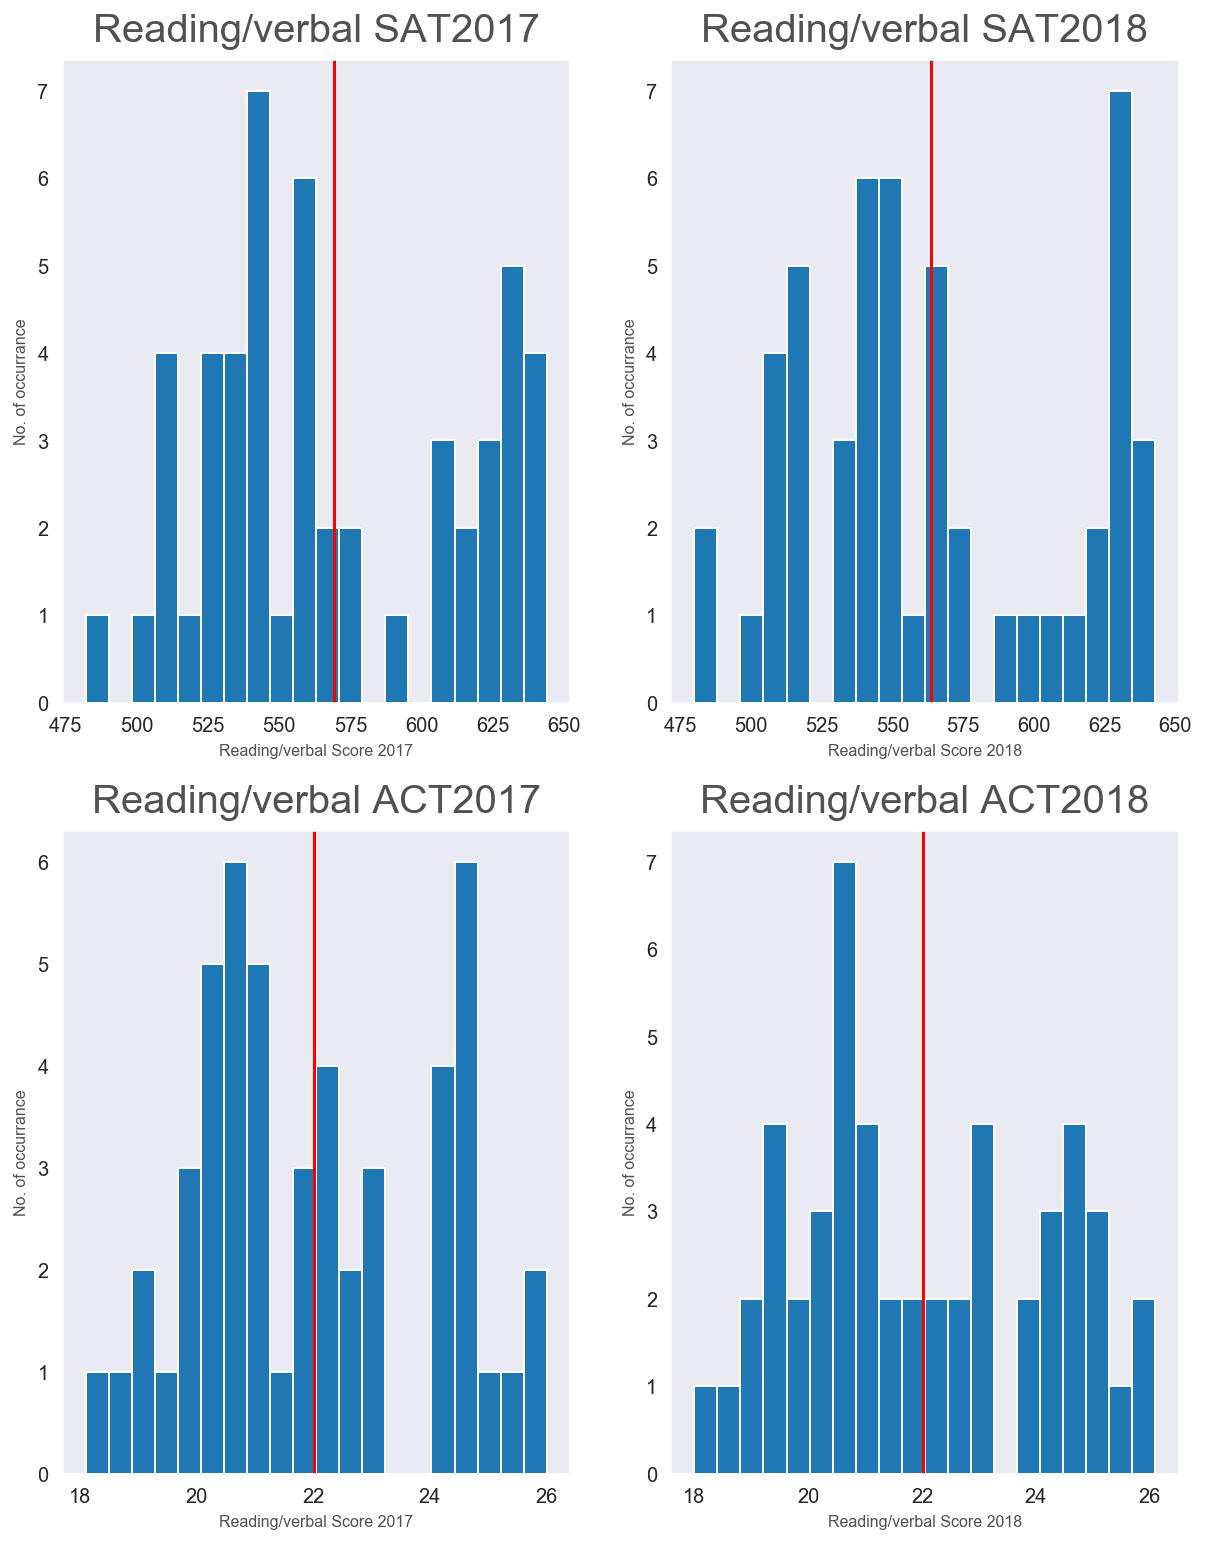

In [338]:
# Plotting Reading/verbal scores for SAT & ACT
#Setting up titles
list_of_titles1 = ['Reading/verbal SAT2017',  'Reading/verbal SAT2018', 'Reading/verbal ACT2017','Reading/verbal ACT2018']
#Setting up labels
list_of_xlabels1 = ['Reading/verbal Score 2017', 'Reading/verbal Score 2018','Reading/verbal Score 2017', 'Reading/verbal Score 2018']
#Setting up columns
list_of_columns1 = [final.columns[2],  final.columns[12],final.columns[8], final.columns[19]]
#Run function to plot graph
subplot_histograms(final,list_of_columns1, list_of_titles1, list_of_xlabels1 )

**Intepretation**

There are more states with high score for SAT in 2018 than in 2017 in EBRW. For ACT, there are lesser states with high score in Reading in 2018 than in 2017. 

#### Plot and interpret scatter plots

In [350]:
def subplot_scatter(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (15,10) ) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.regplot(dataframe[column[0]], dataframe[column[1]],ax=ax[i]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i],fontsize = 20,fontweight = 4, y = 1.01,alpha=0.8) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(column[0],fontsize = 10,fontweight = 2, alpha=0.8)
        ax[i].set_ylabel(column[1],fontsize = 10,fontweight = 2, alpha=0.8)
        #ax[i].axvline(dataframe[column].mean(),color='r')

In [342]:
final.head()

,state,sat17_participation,sat17_ebrw,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,...,sat18_participation,sat18_ebrw,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,...,6.0,595.0,571.0,1166.0,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,...,43.0,562.0,544.0,1106.0,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,...,29.0,577.0,572.0,1149.0,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,...,5.0,592.0,576.0,1169.0,100,19.4,19.1,18.9,19.7,19.4
4,California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,...,60.0,540.0,536.0,1076.0,27,22.7,22.5,22.5,23.0,22.1


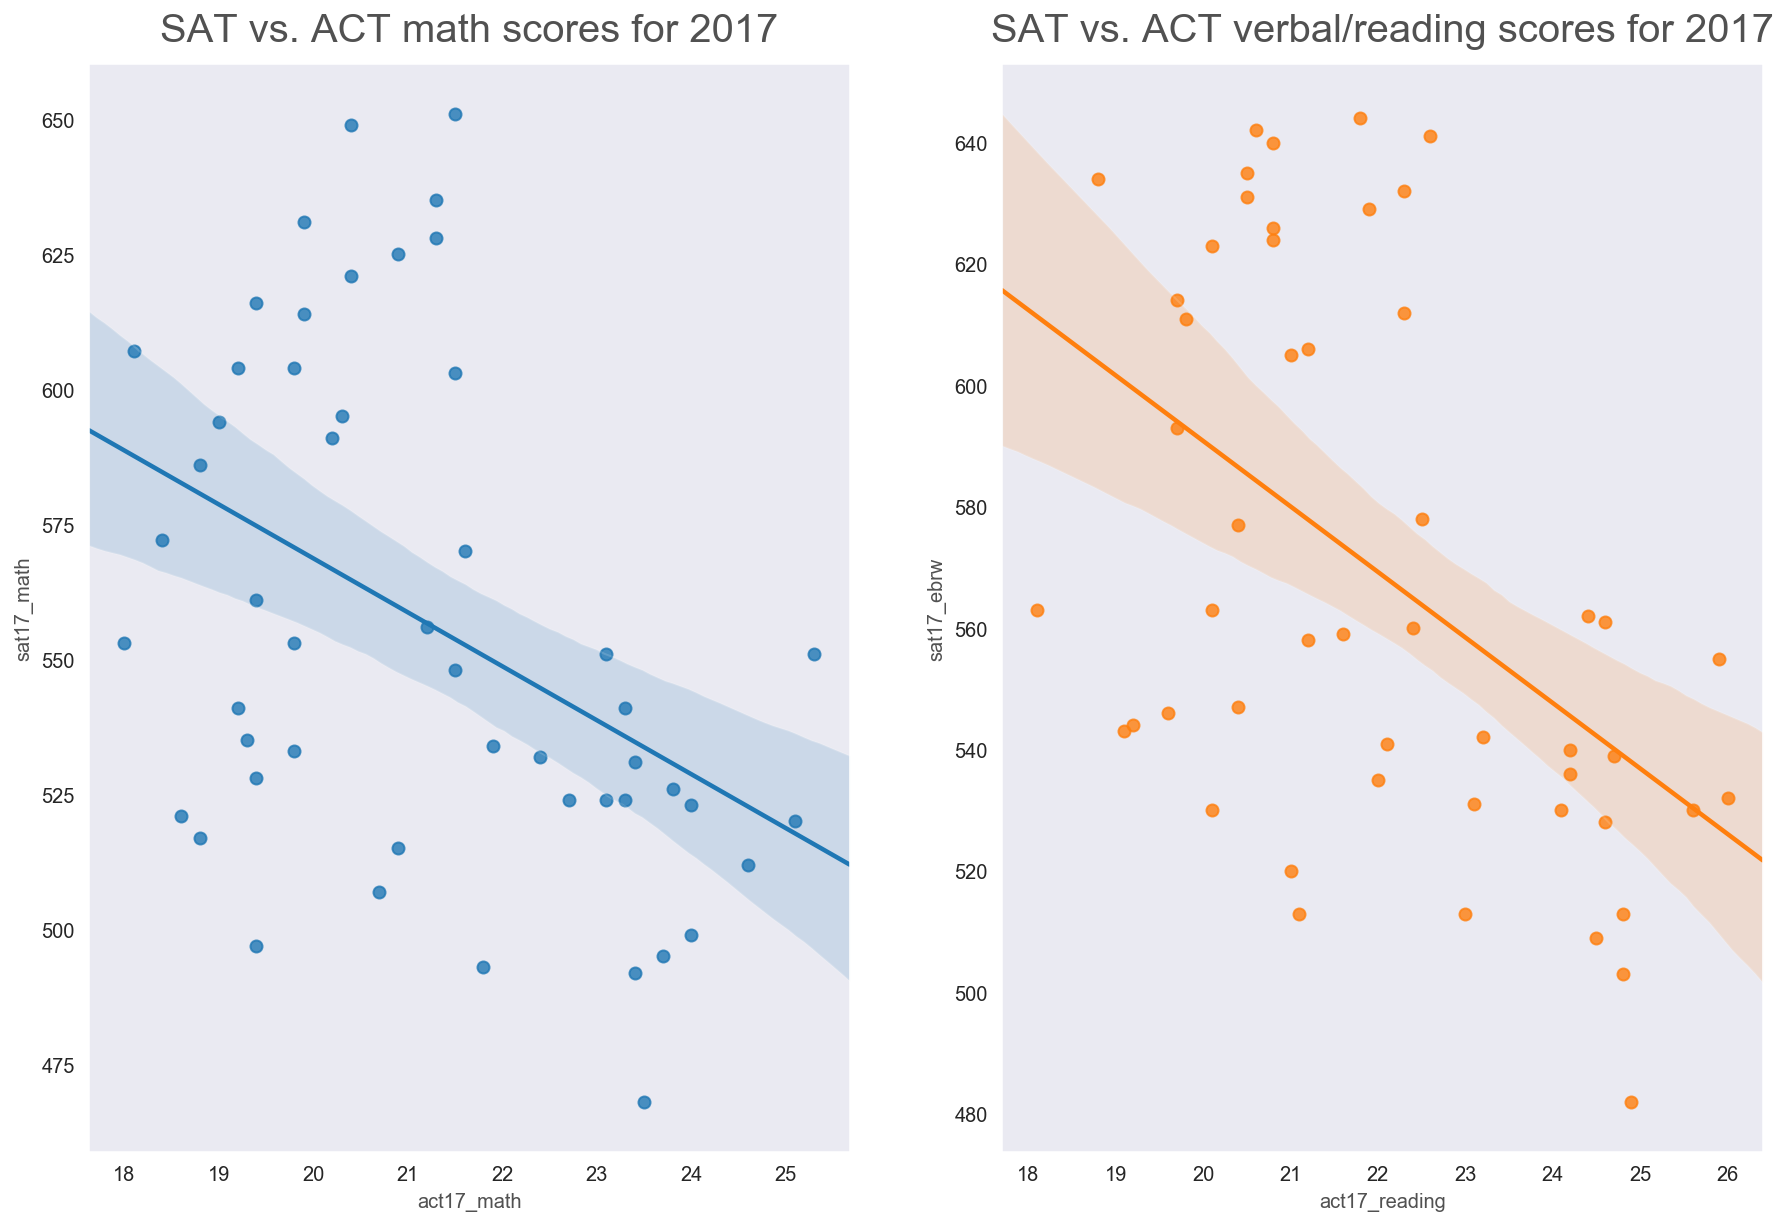

In [351]:
column = [['act17_math', 'sat17_math'],['act17_reading', 'sat17_ebrw']]
title = ['SAT vs. ACT math scores for 2017','SAT vs. ACT verbal/reading scores for 2017']
subplot_scatter(final,column,title)

**Intepretation**

There is an inverse relationship between SAT & ACT math score in 2017. States with higher score in ACT math tend to have lower score for SAT Math.

There is an inverse relationship between SAT & ACT verbal/reading score in 2017. States with higher score in ACT verbal/reading tend to have lower score for SAT verbal/reading.

**Intepretation**

There is an inverse relationship between SAT & ACT verbal/reading score in 2017. States with higher score in ACT verbal/reading tend to have lower score for SAT verbal/reading.

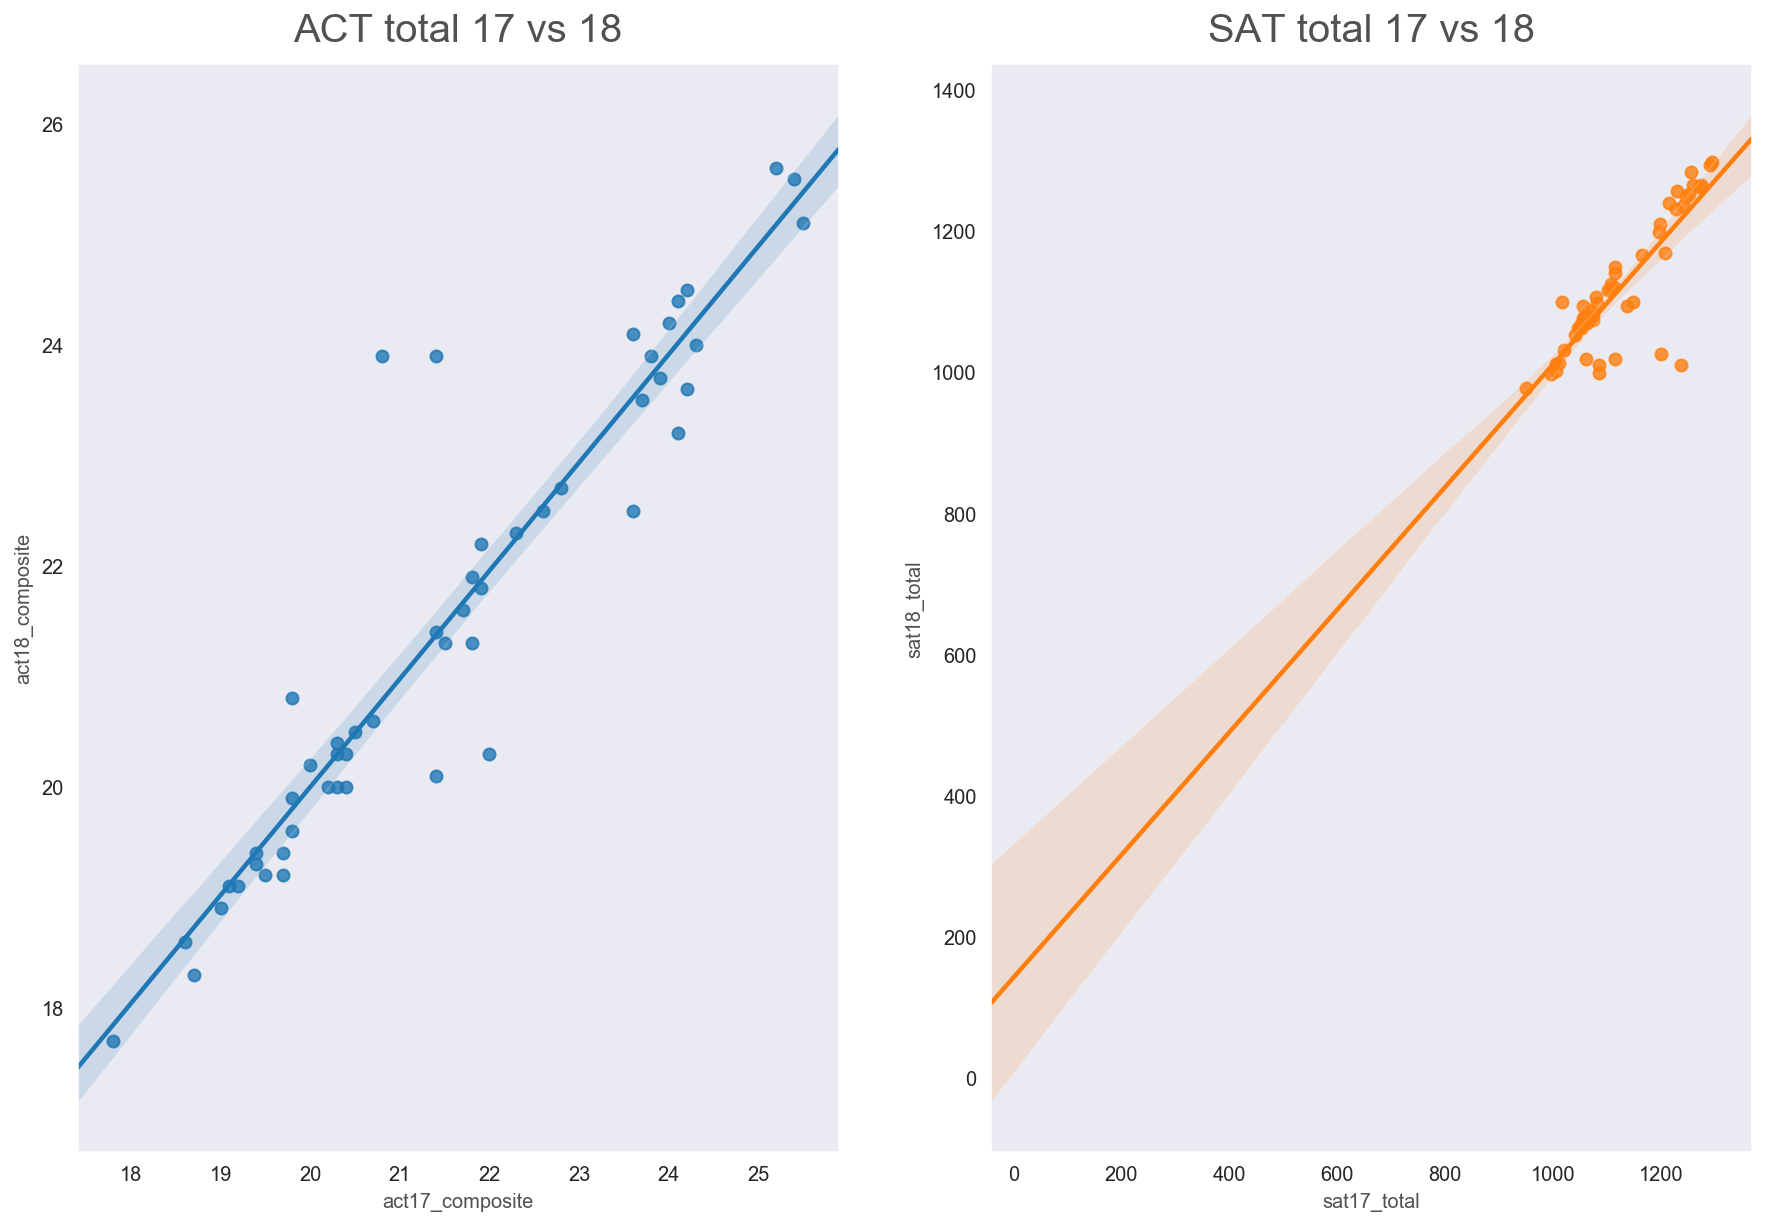

In [354]:
#SAT vs. ACT total/composite scores for 2017
column = [['act17_composite', 'act18_composite'],['sat17_total', 'sat18_total']]
title = ['ACT total 17 vs 18','SAT total 17 vs 18']
subplot_scatter(final,column,title)

**Intepretation**

There is an inverse relationship between SAT & ACT total.composite score in 2017. States with higher score in ACT tend to have lower score for SAT.

In general, states tend to score as well in 2018 as in 2017 for SAT, with a few exceptions. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

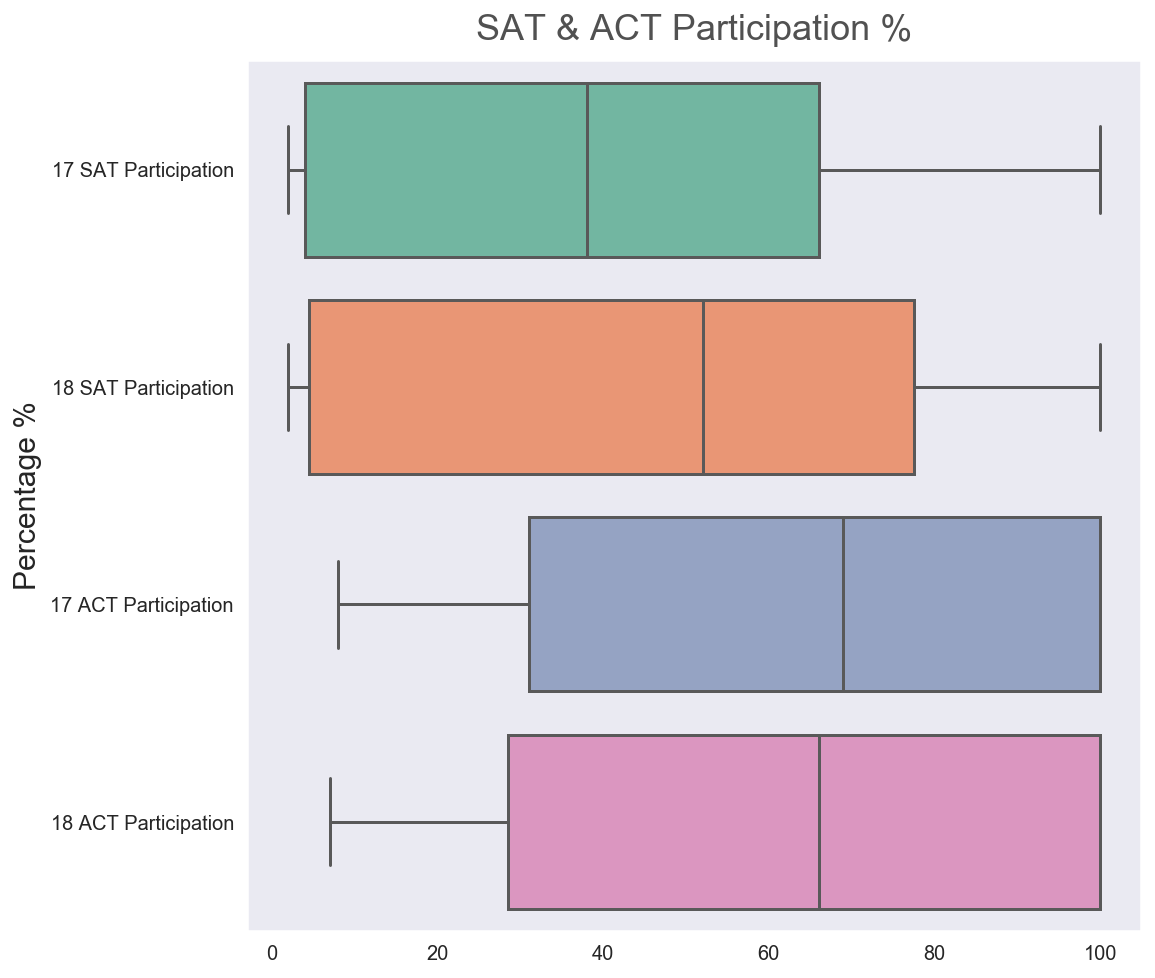

In [376]:
# Plotting Box plot for participation rate

#setting up the axis
yaxis = ['17 SAT Participation', '18 SAT Participation', '17 ACT Participation', '18 ACT Participation']
xaxis = [final['sat17_participation'],final['sat18_participation'],final['act17_participation'],final['act18_participation']]

#plot
plt.figure(figsize=(8,8))
ax = sns.boxplot(xaxis,yaxis,palette = 'Set2',orient='h')
ax.set_title('SAT & ACT Participation %',fontsize = 18,fontweight = 4, y = 1.01,alpha=0.8)
ax.set_ylabel('Percentage %',fontsize=15)
plt.savefig('SAT & ACT Participation boxplot.png'); 

**Intepretation**

The middle value of all 4 sets of data are quite wide spread, showing that there are wide differences between the participation rate for both test in all states in America. Distribution of SAT participation is skewed to the left while ACT is skewed to the right.

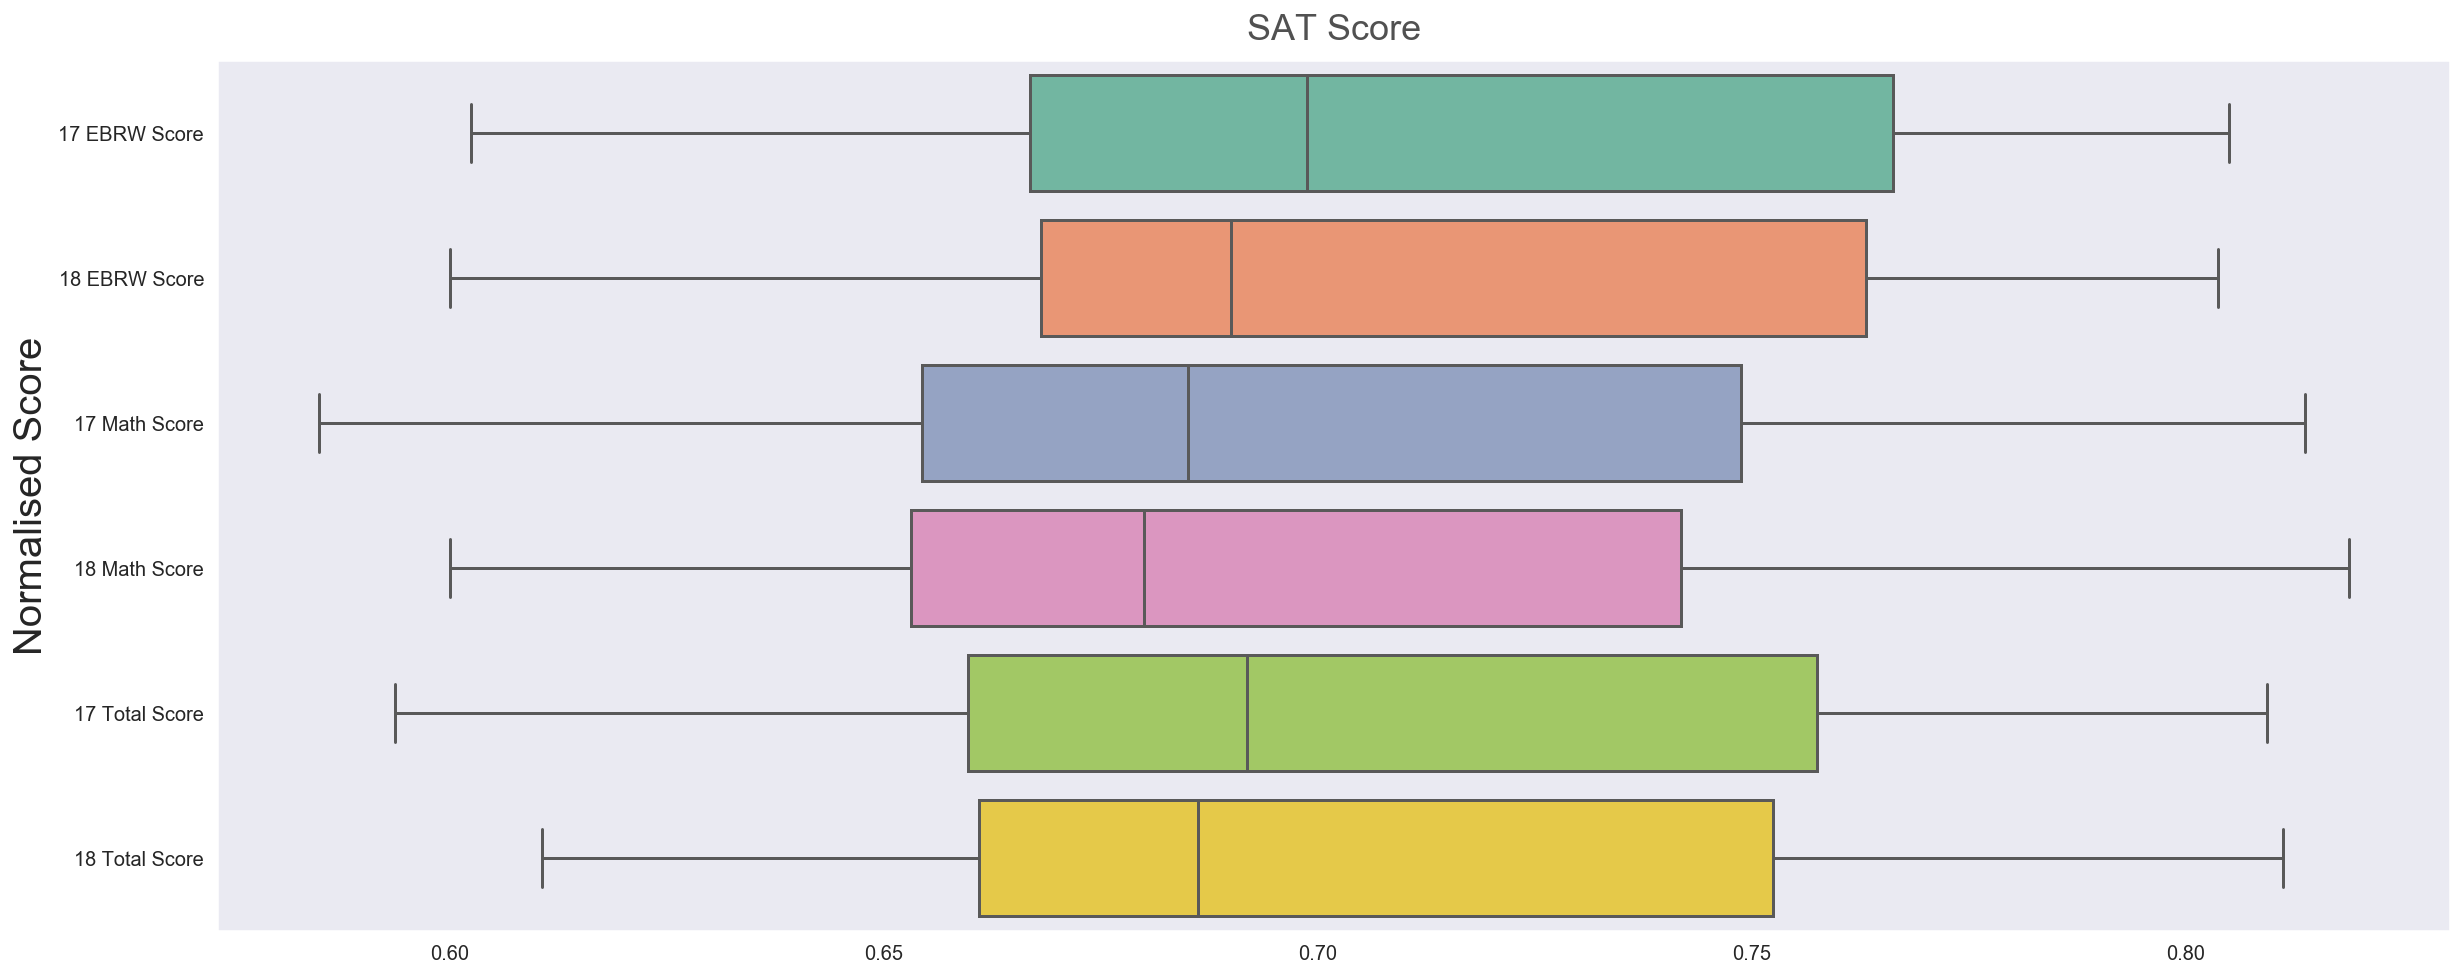

In [361]:
# Plotting Box plot for SAT score
#setting up the axis
yaxis = ['17 EBRW Score', '18 EBRW Score', '17 Math Score', '18 Math Score', '17 Total Score', '18 Total Score']
xaxis = [final['sat17_ebrw']/800,final['sat18_ebrw']/800,final['sat17_math']/800,final['sat18_math']/800, final['sat17_total']/1600, final['sat18_total']/1600]

#plot
plt.figure(figsize=(20,8))
ax = sns.boxplot(xaxis,yaxis,palette = 'Set2',orient='h')
ax.set_title('SAT Score',fontsize = 18,fontweight = 4, y = 1.01,alpha=0.8)
ax.set_ylabel('Normalised Score',fontsize=20)
plt.savefig('SAT Score boxplot.png'); 

**Intepretation**

There are little changes to the spread of data between 2017 and 2018 for various subject scores of SAT, including the total score. No outlier detected. Distribution is close to normal, with EBRW skewing more to right.

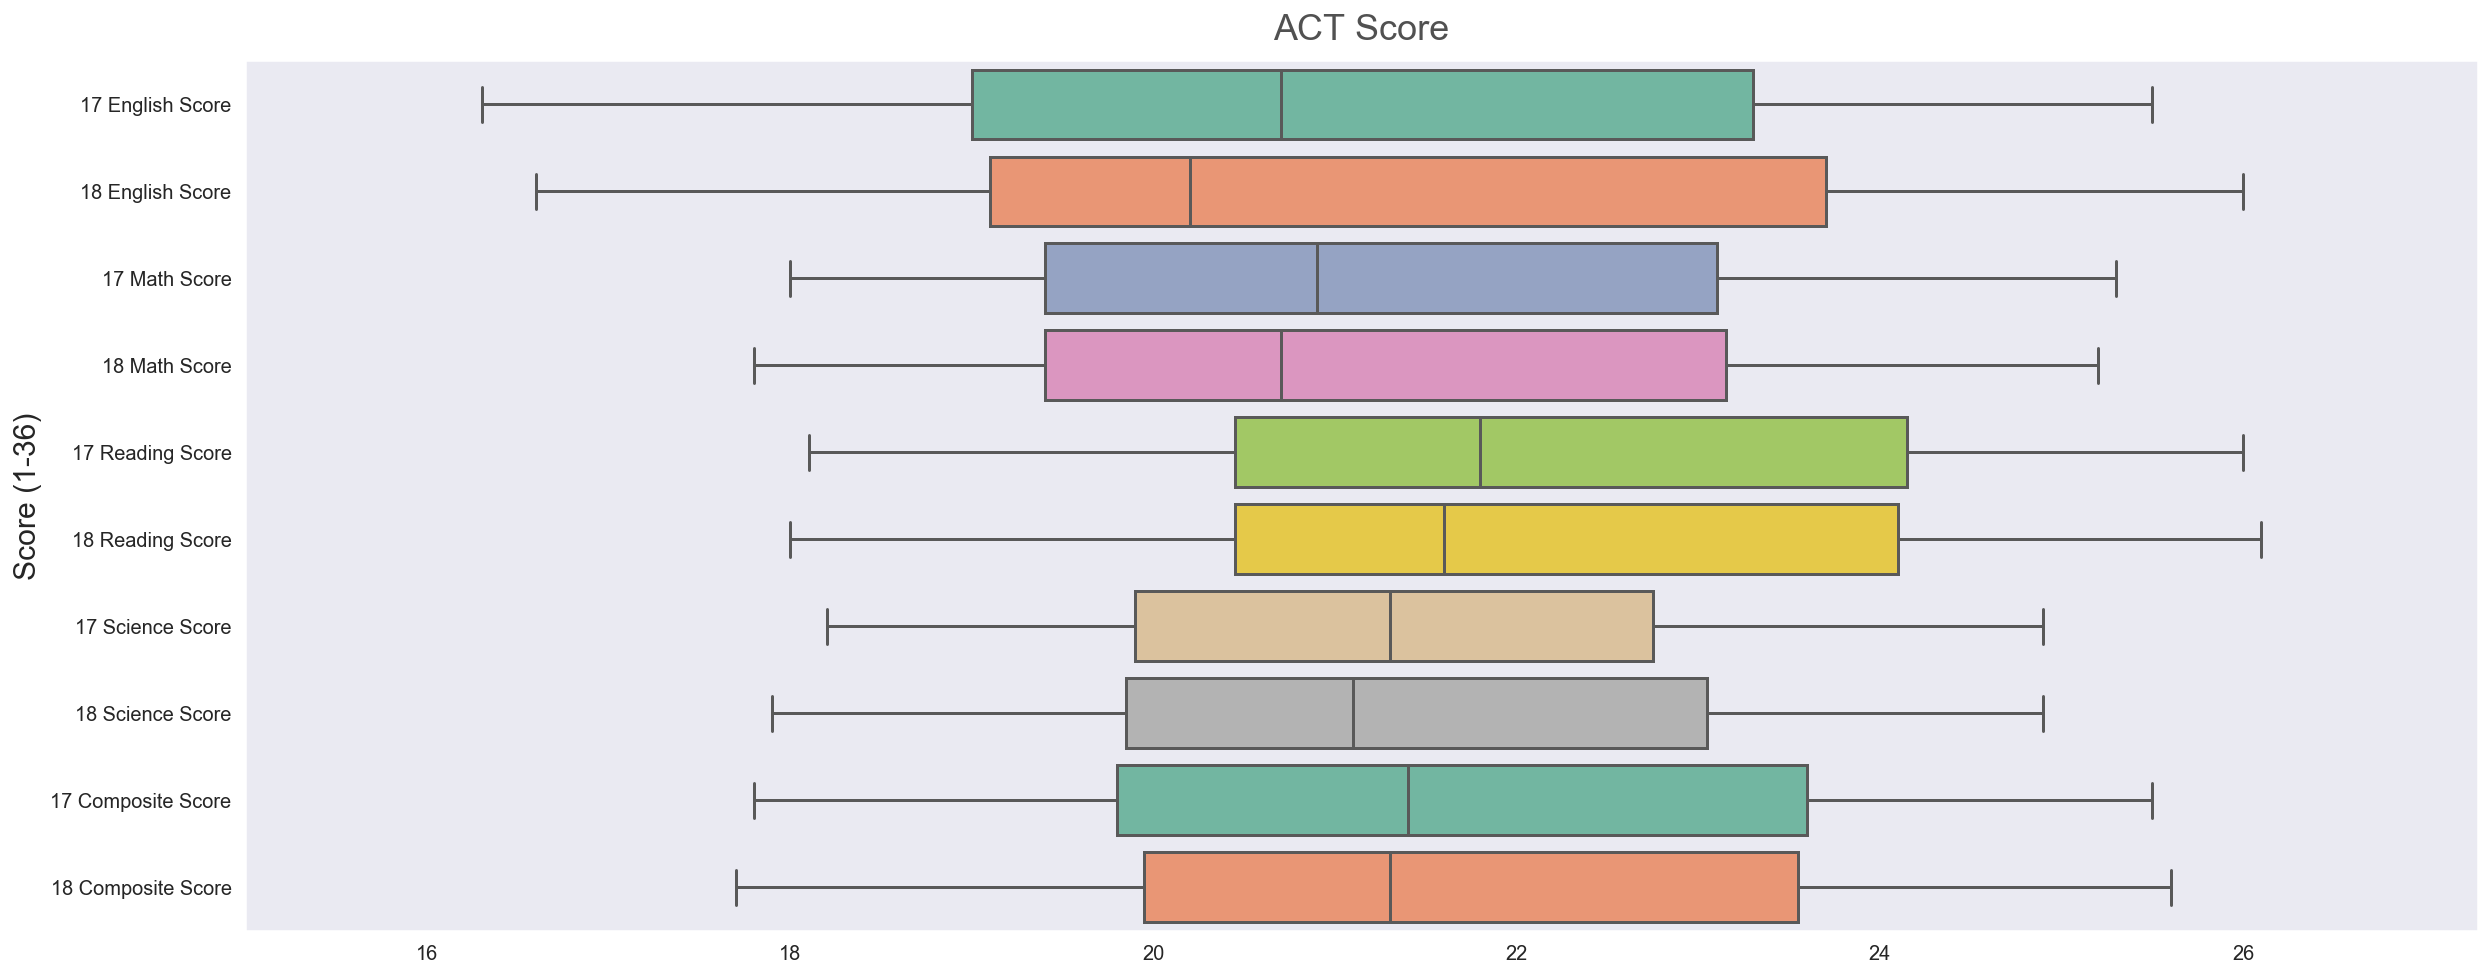

In [382]:
# Plotting Box plot for ACT score
#setting up the axis
yaxis = ['17 English Score', '18 English Score', '17 Math Score', '18 Math Score', '17 Reading Score', '18 Reading Score', '17 Science Score','18 Science Score','17 Composite Score','18 Composite Score']
xaxis = [final['act17_english'],final['act18_english'],final['act17_math'],final['act18_math'], final['act17_reading'], final['act18_reading'], final['act17_science'],final['act18_science'],final['act17_composite'],final['act18_composite']]

#plot
plt.figure(figsize=(20,8))
ax = sns.boxplot(xaxis,yaxis,palette = 'Set2',orient='h')
ax.set_title('ACT Score',fontsize = 18,fontweight = 4, y = 1.01,alpha=0.8)
ax.set_ylabel('Score (1-36)',fontsize=15)
ax.set_xlim(xmin=15)
plt.savefig('ACT Score boxplot.png'); 

**Intepretation**

ACT English score has the widest spread among all subjects. There are no significant changes to the spread of ACT scores between 2017 and 2018, no outlier is detected. Distribution is close to normal for all.

### Additional Plot

Plotting participation rate of change of both tests from 2017 to 2018 for 3 states: Colorado, Florida and New York. 

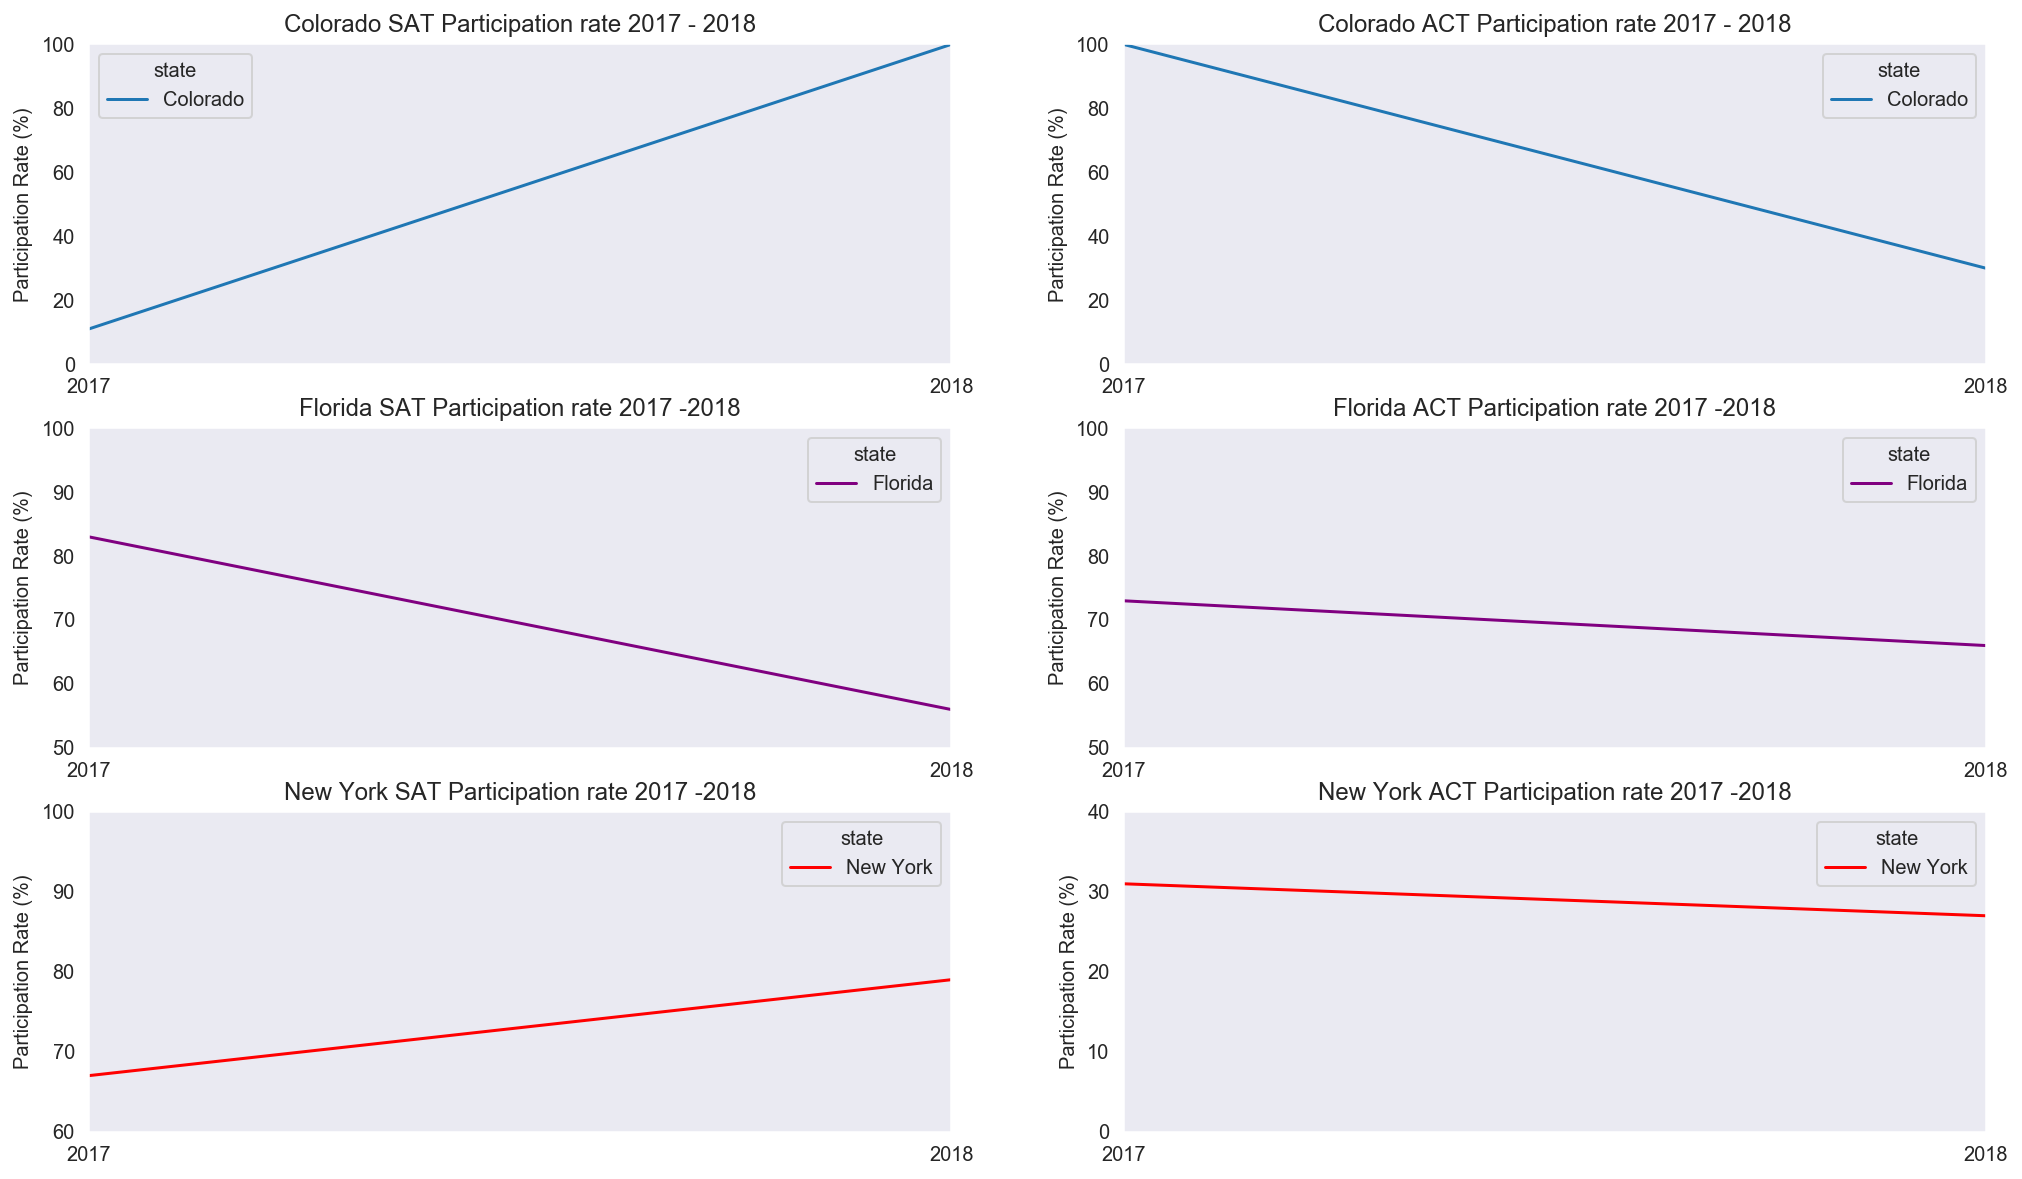

In [384]:
#Filtering to the dataframe which consist of only Colorado, Florida and New York participation rate for SAT & ACT in both years
state_plot = final[(final['state'] == 'Colorado')|(final['state'] == 'Florida')|(final['state'] == 'New York')][['state','sat17_participation','sat18_participation','act17_participation','act18_participation']]
state_plot_T = state_plot.T #Transpose dataframe
new_header = state_plot_T.iloc[0] #assign 1st row as new header 
state_plot_T = state_plot_T[1:] #drop off the 1st column of old header
state_plot_T.columns = new_header #replace with new header

#setting up subplot
fig, axes = plt.subplots(3,2, figsize=(20,20))

#Plotting Colorado SAT participation rate of change between 2017 & 2018
state_plot_T.iloc[0:2,:1].plot(figsize=(17,9), fontsize=10, ax=axes[0][0])
axes[0][0].set_xticklabels(['2017','','','','','2018'],fontsize=10);
axes[0][0].set_ylabel('Participation Rate (%)',fontsize=10);
axes[0][0].set_ylim(0,100);
axes[0][0].set_title('Colorado SAT Participation rate 2017 - 2018');

#Plotting Colorado ACT participation rate of change between 2017 & 2018
state_plot_T.iloc[2:,:1].plot(figsize=(17,9), fontsize=10, ax=axes[0][1])
axes[0][1].set_xticklabels(['2017','','','','','2018'],fontsize=10);
axes[0][1].set_ylabel('Participation Rate (%)',fontsize=10);
axes[0][1].set_ylim(0,100);
axes[0][1].set_title('Colorado ACT Participation rate 2017 - 2018');

#Plotting Florida SAT participation rate of change between 2017 & 2018
state_plot_T.iloc[0:2,1:2].plot(figsize=(17,9), color ='purple', fontsize=10, ax=axes[1][0])
axes[1][0].set_xticklabels(['2017','','','','','2018'],fontsize=10);
axes[1][0].set_ylabel('Participation Rate (%)',fontsize=10);
axes[1][0].set_ylim(50,100);
axes[1][0].set_title('Florida SAT Participation rate 2017 -2018');

#Plotting Florida ACT participation rate of change between 2017 & 2018
state_plot_T.iloc[2:,1:2].plot(figsize=(17,9),color ='purple', fontsize=10, ax=axes[1][1])
axes[1][1].set_xticklabels(['2017','','','','','2018'],fontsize=10);
axes[1][1].set_ylabel('Participation Rate (%)',fontsize=10);
axes[1][1].set_ylim(50,100);
axes[1][1].set_title('Florida ACT Participation rate 2017 -2018');

#Plotting New York SAT participation rate of change between 2017 & 2018
state_plot_T.iloc[:2,-1:].plot(figsize=(17,9), color ='red', fontsize=10, ax=axes[2][0])
axes[2][0].set_xticklabels(['2017','','','','','2018'],fontsize=10);
axes[2][0].set_ylabel('Participation Rate (%)',fontsize=10);
axes[2][0].set_ylim(60,100);
axes[2][0].set_title('New York SAT Participation rate 2017 -2018');

#Plotting New York ACT participation rate of change between 2017 & 2018
state_plot_T.iloc[2:,-1:].plot(figsize=(17,10),color ='red', fontsize=10, ax=axes[2][1])
axes[2][1].set_xticklabels(['2017','','','','','2018'],fontsize=10);
axes[2][1].set_ylabel('Participation Rate (%)',fontsize=10);
axes[2][1].set_ylim(0,40);
axes[2][1].set_title('New York ACT Participation rate 2017 -2018');

plt.savefig('3 State line plot.png'); 

The 3 pairs of graphs above show the increase and drop of SAT and ACT from 2017 and 2018 of 3 cities, Colorado, Florida and New York. The reason of these increase/dreaces will be explained further below. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

|Variable|Mean|STD|Q1|Q2|Q3|Min|Max|Description based on statistics & boxplot|
|---|---|---|---|---|---|---|---|---|
|**sat17_participation**|40|35|4|38|66|2|100|Distribution is skewed to the left with a wide spread data from mean|
|**sat17_ebrw**|569|45|533|559|613|482|644|Distribution is slightly skewed to the right|
|**sat17_math**|557|47|523|548|599|468|651|Distribution is not skewed|
|**sat17_total**|1126|93|1055|1107|1212|950|1295|Distribution is not skewed|
|**sat17_participation**|46|37|5|52|78|2|100|Distribution is skewed to the left with a wide spread data from mean|
|**sat18_ebrw**|564|48|535|552|611|180|643|Distribution is slightly skewed to the right|
|**sat18_math**|556|48|522|544|594|480|655|Distribution is not skewed|
|**sat18_total**|1120|94|1058|1098|1204|977|1298|Distribution is not skewed|
|**act17_participation**|65|32|31|69|100|8|100|Distribution is skewed to the right with a wide spread data from mean|
|**act17_english**|21|2|19|20|23|16|26|Distribution is not skewed|
|**act17_math**|21|2|19|21|23|18|25|Distribution is slightly skewed to the left|
|**act17_reading**|22|2|21|22|24|18|26|Distribution is slightly skewed to the right|
|**act17_science**|22|2|20|21|23|18|25|Distribution is not skewed|
|**act17_composite**|22|2|20|21|24|18|26|Distribution is not skewed|
|**act18_participation**|61|34|29|66|100|7|100|Distribution is skewed to the right with a wide spread data from mean|
|**act18_english**|21|3|19|20|24|17|26|Distribution is not skewed|
|**act18_math**|21|2|19|21|23|18|25|Distribution is slightly skewed to the left|
|**act18_reading**|22|2|21|22|24|18|26|Distribution is not skewed|
|**act18_science**|21|2|18|20|21|23|25|Distribution is not skewed|
|**act18_composite**|22|2|20|21|24|18|26|Distribution is not skewed|

In general, the data of SAT has an inverse relationship with corresponding data of ACT with correlation of -0.5 ~ -0.4

> <font size = 3 color = "crimson"> Do also read up on the shapiro wilk test as a test for normality. https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/</font>

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No, because there are data in the sample that are skewed and hence not normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

The assumption does not hold for all 3 variables, as the plotted histograms for these 3 variable do not resemble a normally distribuion graph. This imply that we are unable to apply central limit therom to make estimation unless our sample size is larger than 30. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: We are only able to conduct statistical inference for the participation rate of both tests in the same year as they would have the same population size. Other than that, as the population size vary across the test and year, it does not make sense to make any inference from these data. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:
No. Because SAT and ACT has different number of students taking the test. Hence, . We can, however, compare the year-on-year changes or determine if there is any corrorelation between the 2 variables. 

## Outside Research

In [383]:
final[(final['state'] == 'Colorado')|(final['state'] == 'Florida')|(final['state'] == 'New York')][['state','sat17_participation','sat18_participation','act17_participation','act18_participation']]

,state,sat17_participation,sat18_participation,act17_participation,act18_participation
5,Colorado,11.0,100.0,100.0,30
9,Florida,83.0,56.0,73.0,66
32,New York,67.0,79.0,31.0,27


#### Colorado

The SAT participation rate of Colorado increase to 100% in 2018 from 11% in 2017. This is because Colorado made a change to making SAT their mandatory standardised test for high school students in 2017. The process is an opening bidding process where both SAT and ACT has to compete for the tender from Colorado. SAT won the bid even though ACT was traditionally the mandated test in Colorado. This may be due to SAT being a more accurate indicator of whether the students are ready for colleage, and also because SAT provide a better service and resources for students taking the test ([Source](https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/)). Another reason might be the wavier program of SAT is more flexible with less strict requirement as compared to ACT, hence SAT is a more inclusive program than ACT. 


#### Florida

Competition between ACT and SAT has always been competitive in Florida since 2006 ([Source](https://www.washingtonpost.com/local/education/sat-usage-declined-in-29-states-over-7-years/2014/03/15/f4504cfc-a5ff-11e3-8466-d34c451760b9_story.html)). In general, the average score of SAT and ACT in florida are also lower than national average. Hence may indicate that the overall interests in either exam is low in florida, hence the drop in participation rate for both SAT and ACT over 2017 and 2018. However in 2019, Flroida has a a high participation rate of 97% ([Source](https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html)) because of the free SAT “school day” initiative, where teenagers can take the exam during a regular school day with the cost covered by their schools, not their parents.


#### New York
New York has an increase in SAT participation rate from 69 to 79 from 2017 to 2018. This is hugely due to the new initiative that allows all high-school juniors to take the exam for free during the school day. Futhermore, free wavier ($2.2 million USD / year) is provided to low-income students to make SAT more inclusive, which also contributed to the higher participation rate of New York. ([Source](https://chalkbeat.org/posts/ny/2018/01/11/record-number-of-new-york-city-students-take-sat-after-city-offers-test-for-free/))


## Conclusions and Recommendations

Based on the hypothesis testing, there may be a higher probability that the difference between the mean participation rate of SAT and ACT is decreasing. We also know from our dataset that the mean participation rate of ACT dropped from 65 to 61 and mean participation rate of SAT increased from 40 to 46. Hence we can infer that there is a trend in USA with more and more students taking up SAT. 

Our previous analysis of the 3 states (Colorado, Florida and New York) showed that SAT's wavier and allowing students to take exam during schol days program have increased the popularity of SAT effectively. 

Hence, the focus of the colleage board should be targeting a state that has not yet make ACT mandatory with low SAT participation rate, which is the state of Iowa. The following recommendation are made based on the Every Student Succeeds Act requirement signed by President Obama in 2015. ([Source](https://www.ed.gov/esea))

**Recommendation on increasing participation rate in Iowa:**

1) Widen the wavier eligibility of students to more lower income group

2) Consider providing more support in terms of preparing for SAT exam to lower income group, especially in math and science (where the average scores are lower than that of Evidence-Based, Reading and Writing)

3) Reach out to minority group such as black african american and provide equity opportunity to the groups to take SAT

4) Create awareness about SAT's inclusive program to state government and universities in Iowa




**Data required for more analysis**

1) Income group of students which took in SAT or ACT

2) Population size of students which took SAT and ACT

3) Success rate of students entering University for each state for both SAT and ACT

4) Ethnics group of students which took SAT or ACT